# Import Modules

In [1]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt

from skimage import exposure

***
# Initialize and load original image

In [2]:
# raw_image = cv2.imread('../images/lenna.png')
raw_image = cv2.imread('../images/cameraman.png')
# raw_image = cv2.imread('../images/edin_castle.png')
# raw_image = cv2.imread('../images/bowl_fruit.png')
# raw_image = cv2.imread('../images/peppers.png')
# raw_image = cv2.imread('../images/map_of_spain.png')

img_rgb = cv2.cvtColor(raw_image, cv2.COLOR_BGR2RGB)

***
# Image description

In [3]:
height, width, color_channel = img_rgb.shape

print(f'Height        : {height} pixels')
print(f'Width         : {width} pixels')
print(f'Color channel : {color_channel} (RGB)')

Height        : 256 pixels
Width         : 256 pixels
Color channel : 3 (RGB)


***
# Dispaly original image and description

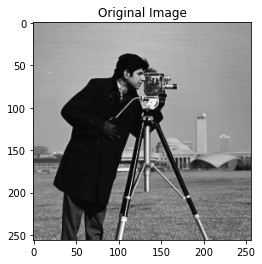

Height        : 256 pixels
Width         : 256 pixels
Color channel : 3 (RGB)


In [4]:
plt.imshow(img_rgb)
plt.title('Original Image')
plt.show()

height, width, color_channel = img_rgb.shape

print(f'Height        : {height} pixels')
print(f'Width         : {width} pixels')
print(f'Color channel : {color_channel} (RGB)')

***
# Display original image histogram

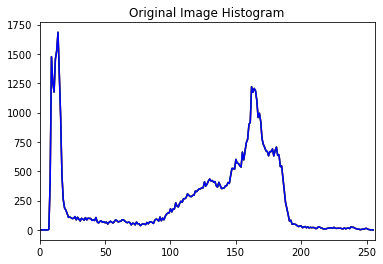

In [5]:
color = ('r', 'g', 'b') 

for i, col in enumerate(color): 
    histr = cv2.calcHist([img_rgb], [i], None, [256], [0, 256])

    plt.plot(histr, color = col)
    plt.xlim([0, 256])

plt.title('Original Image Histogram')
plt.show()

***
# Show list value each pixel

In [6]:
img_rgb

array([[[156, 156, 156],
        [159, 159, 159],
        [158, 158, 158],
        ...,
        [151, 151, 151],
        [152, 152, 152],
        [152, 152, 152]],

       [[160, 160, 160],
        [154, 154, 154],
        [157, 157, 157],
        ...,
        [154, 154, 154],
        [155, 155, 155],
        [153, 153, 153]],

       [[156, 156, 156],
        [159, 159, 159],
        [158, 158, 158],
        ...,
        [151, 151, 151],
        [152, 152, 152],
        [152, 152, 152]],

       ...,

       [[114, 114, 114],
        [132, 132, 132],
        [123, 123, 123],
        ...,
        [135, 135, 135],
        [137, 137, 137],
        [114, 114, 114]],

       [[121, 121, 121],
        [126, 126, 126],
        [130, 130, 130],
        ...,
        [133, 133, 133],
        [130, 130, 130],
        [113, 113, 113]],

       [[121, 121, 121],
        [126, 126, 126],
        [130, 130, 130],
        ...,
        [133, 133, 133],
        [130, 130, 130],
        [113, 113, 113]]

***
# Logarithmic transformation

- Formula, sebagai berikut <b>s = c * log(1 + r)</b>
- <b>c</b> adalah kontanta yang didapatkan melalui formula, berikut <b>255 / log(1 + m)</b>
- <b>m</b> adalah nilai piksel tertinggi dari gambar yang digunakan sebagai input
- Nilai piksel yang berada pada rentang abu-abu yang jumlah kecil akan ditingkatkan nilainya, sehingga menjadi lebih terlihat

### - Calculate constant

In [7]:
c = 255 / (np.log(1 + np.max(img_rgb)))
print(f'Constant value             : {c}')
print(f'Max value pixel from image : {np.max(img_rgb)}')

Constant value             : 46.05103967062828
Max value pixel from image : 253


### - Calculate logarithmic transformation

In [8]:
log_transformed = c * np.log(255 + img_rgb)

### - Specify the data type

In [9]:
log_transformed = np.array(log_transformed, dtype=np.uint8)

### - Show value of log_transformed variable

In [10]:
log_transformed

array([[[232, 232, 232],
        [233, 233, 233],
        [232, 232, 232],
        ...,
        [230, 230, 230],
        [231, 231, 231],
        [231, 231, 231]],

       [[233, 233, 233],
        [231, 231, 231],
        [232, 232, 232],
        ...,
        [231, 231, 231],
        [231, 231, 231],
        [231, 231, 231]],

       [[232, 232, 232],
        [233, 233, 233],
        [232, 232, 232],
        ...,
        [230, 230, 230],
        [231, 231, 231],
        [231, 231, 231]],

       ...,

       [[217, 217, 217],
        [224, 224, 224],
        [221, 221, 221],
        ...,
        [225, 225, 225],
        [226, 226, 226],
        [217, 217, 217]],

       [[220, 220, 220],
        [222, 222, 222],
        [223, 223, 223],
        ...,
        [224, 224, 224],
        [223, 223, 223],
        [217, 217, 217]],

       [[220, 220, 220],
        [222, 222, 222],
        [223, 223, 223],
        ...,
        [224, 224, 224],
        [223, 223, 223],
        [217, 217, 217]]

### - Display image with logarithmic transformation

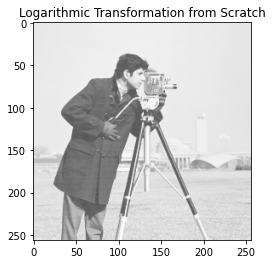

In [11]:
plt.imshow(log_transformed)
plt.title('Logarithmic Transformation from Scratch')
plt.show()

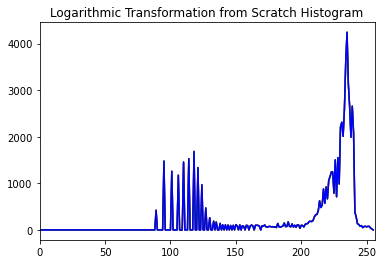

In [12]:
color = ('r', 'g', 'b') 

for i, col in enumerate(color): 
    histr = cv2.calcHist([log_transformed], [i], None, [256], [0, 256])

    plt.plot(histr, color = col)
    plt.xlim([0, 256])

plt.title('Logarithmic Transformation from Scratch Histogram')
plt.show()

***
# With image processing module

### - Logarithmic transformation image with scikit-image module

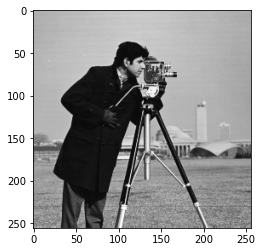

In [13]:
logarithmic_corrected = exposure.adjust_log(image=img_rgb, gain=1)

plt.imshow(logarithmic_corrected)
plt.show()

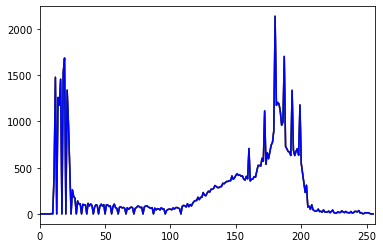

In [14]:
color = ('r', 'g', 'b') 

for i, col in enumerate(color): 
    histr = cv2.calcHist([logarithmic_corrected], [i], None, [256], [0, 256])

    plt.plot(histr, color = col)
    plt.xlim([0, 256])

plt.show()